In [1]:
from sklearn.datasets import make_blobs
from btseg.clustering import DBScan

In [2]:
model = DBScan('../data/Times', 'euclidean')

In [3]:
db, X = model.run()

Estimated number of clusters: 1
Estimated number of noise points: 87


Estimated number of clusters: 1
Estimated number of noise points: 87


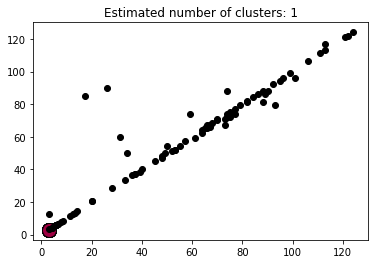

In [4]:
import numpy as np
from sklearn import metrics

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [5]:
X

array([[113.03981599, 117.15374514, 117.27318534, ..., 109.0733698 ,
        111.01801656, 112.0044642 ],
       [  2.82842712,   2.82842712,   2.82842712, ...,   2.82842712,
          2.82842712,   2.82842712],
       [  5.83095189,   5.83095189,   5.83095189, ...,   5.83095189,
          5.83095189,   5.83095189],
       ...,
       [ 88.05112151,  88.141931  ,  88.36288814, ...,  88.05112151,
         88.00568163,  88.00568163],
       [  3.        ,  12.64911064,   9.8488578 , ...,   3.        ,
          3.        ,   3.        ],
       [ 73.06161783,  71.1758386 ,  71.34423593, ...,  73.02739212,
         73.        ,  73.02739212]])

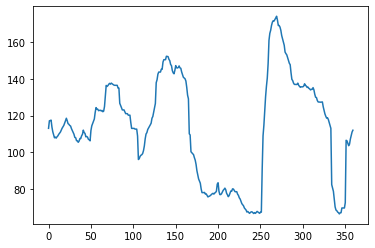

In [6]:
plt.plot(X[0])

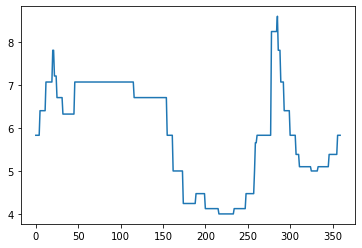

In [8]:
plt.plot(X[2])